# House Price Prediction - 04 - Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

In [2]:
sns.set(rc={"figure.figsize":(16, 9)})

In [3]:
df_train = pd.read_csv("data/train.csv")

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

#### Drop ID column (no duplicates) 

In [6]:
df_train.drop(['Id'], axis=1, inplace=True)

#### Imputation 

In [7]:
values = {'Alley': 'No alley access', 'MiscFeature': 'None', 'PoolQC': 'No Pool',
          'Fence': 'No Fence', 'FireplaceQu': 'No Fireplace', 'LotFrontage': 'No Lotfrontage',
         'GarageYrBlt': ' No Garage', 'GarageCond': ' No Garage', 'GarageType': ' No Garage',
          'GarageFinish': ' No Garage', 'GarageQual': ' No Garage', 'BsmtQual': 'No Basement',
          'BsmtCond': 'No Basement', 'BsmtExposure': 'No Basement', 'BsmtFinType1': 'No Basement',
          'BsmtFinType2': 'No Basement', 'MasVnrType': 'None', 'MasVnrArea': 'None', }

df_train.fillna(value=values, inplace=True)
df_train.Electrical.fillna(df_train.Electrical.mode()[0], inplace=True)

In [8]:
df_train.isnull().sum().sum()

0

#### Modelling 

In [9]:
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 
           'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'Fireplaces']

In [10]:
def iterate_model_features(features):
    for feature in features:
        X_train, X_test, y_train, y_test = train_test_split(df_train[[feature]], df_train.SalePrice,
                                                        test_size = 0.25, random_state = 0)
        model_lr = LinearRegression()
        model_lr.fit(X_train, y_train)
        y_train_pred = model_lr.predict(X_train)
        y_test_pred = model_lr.predict(X_test)
        print(feature)
        print(f'mean squared error: %.0f'
          % mean_squared_error(y_test, y_test_pred), end='')
        print(' - Coefficient of determination: %.2f'
          % r2_score(y_test, y_test_pred), end='\n\n')
    
iterate_model_features(features=features)

OverallQual
mean squared error: 2394597560 - Coefficient of determination: 0.64

GrLivArea
mean squared error: 3705065902 - Coefficient of determination: 0.44

GarageCars
mean squared error: 4316555346 - Coefficient of determination: 0.35

GarageArea
mean squared error: 4498553860 - Coefficient of determination: 0.32

TotalBsmtSF
mean squared error: 4568077326 - Coefficient of determination: 0.31

1stFlrSF
mean squared error: 4381459977 - Coefficient of determination: 0.34

FullBath
mean squared error: 4831892493 - Coefficient of determination: 0.27

TotRmsAbvGrd
mean squared error: 5020210339 - Coefficient of determination: 0.24

YearBuilt
mean squared error: 4830018416 - Coefficient of determination: 0.27

YearRemodAdd
mean squared error: 5088149531 - Coefficient of determination: 0.23

Fireplaces
mean squared error: 5265823115 - Coefficient of determination: 0.20



In [28]:
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 
           'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'Fireplaces']

def cumulative_model_features(features):
    for i in range(9):
        features_cumulative = features[0:i]
        X_train, X_test, y_train, y_test = train_test_split(df_train[features_cumulative], df_train.SalePrice,
                                                        test_size = 0.25, random_state = 0)
        model_lr = LinearRegression()
        model_lr.fit(X_train, y_train)
        y_train_pred = model_lr.predict(X_train)
        y_test_pred = model_lr.predict(X_test)
        print(features_cumulative)
        print(f'mean squared error: %.0f'
          % mean_squared_error(y_test, y_test_pred), end='')
        print(' - Coefficient of determination: %.2f'
          % r2_score(y_test, y_test_pred), end='\n\n')
    
cumulative_model_features(features=features)

ValueError: at least one array or dtype is required

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train.SalePrice, test_size = 0.25, random_state = 0)

In [13]:
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test : {y_test.shape}')

X_train: (1095, 11)
X_test: (365, 11)
y_train: (1095,)
y_test : (365,)


In [14]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [15]:
y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

In [16]:
print('Coefficients: \n', model_lr.coef_)

Coefficients: 
 [ 1.65558743e+04  5.23400833e+01 -2.48757238e+02  4.78191338e+01
  3.19758123e+01  6.90584300e+00 -6.36754865e+03  3.28608640e+02
  2.84951556e+02  3.55082909e+02  1.13699340e+04]


In [17]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_test_pred))

Mean squared error: 2132350683.12


#### The coefficient of determination: 1 is perfect prediction

The coefficient of determination tells you what proportion of the variance in your predicted variables can be explained by the predictors.

If your determination coefficient is 1, your predictors perfectly predict your dependent variables. If it is 0, your predictors tell you nothing about the value of the dependent variable.

taken from: https://programmathically.com/the-coefficient-of-determination-and-linear-regression-assumptions/

In [18]:
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_test_pred))

Coefficient of determination: 0.68


#### Prediction Plots

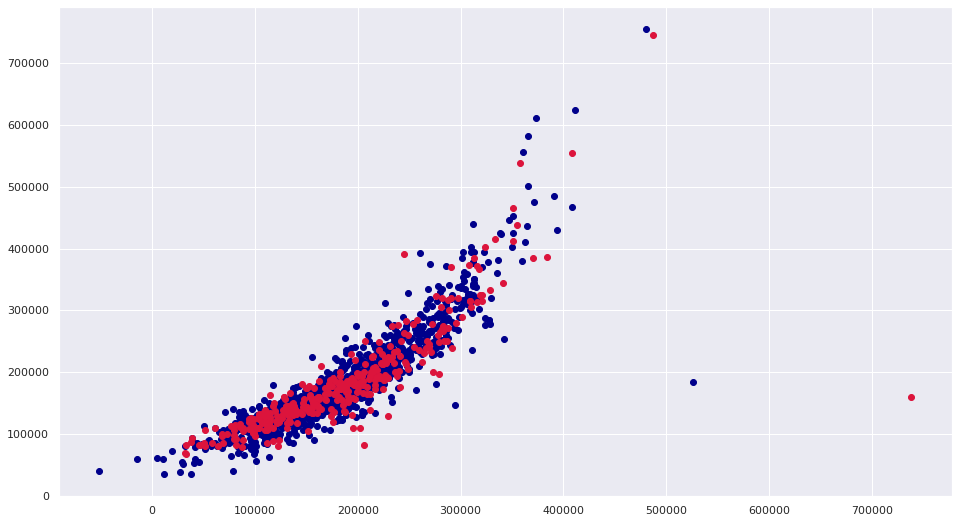

In [19]:
plt.scatter(y_train_pred, y_train, color="darkblue")
plt.scatter(y_test_pred, y_test, color="crimson")